Codigo de Guillermo Romeo Cepeda Medina A01284015
En este código se desarrolló la práctica 3 llamada transformaciones para el análisis estadístico de una categoría del dataset de mcdonalds

In [203]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/guillermocepeda/C:C++/Implementacion_IA_a01284015/Entregables/Regresion_logistica/mc-donalds-menu-1.csv',sep=',')
#select "total fat" category
df = df[['Total Fat']]
df.dropna()
# drop negative values
print(df.shape[0])
df = df[df['Total Fat'] > 0]
# print size of data
print(df.shape[0])


#Utiliza la transformación Box-Cox. Utiliza el modelo exacto y el approximado de acuerdo con las sugerencias de Box y Cox para la transformación

#Transformacion Box-Cox
box_data, lambda_box = stats.boxcox(df['Total Fat'])
print(lambda_box)
#modelo exacto
def boxcox_model(x,lamb):
    if lamb == 0:
        return np.log(x)
    return (x**lamb - 1)/lamb

#modelo approximado
def boxcox_model_approx(x,lamb):
    if lamb < -1.5:
        return 1/x**2
    elif lamb < -0.75:
        return 1/x
    elif lamb < -0.25:
        return 1/np.sqrt(x)
    elif lamb < 0.25:
        return np.log(x)
    elif lamb < 0.75:
        return np.sqrt(x)
    elif lamb < 1.5:
        return x
    else:
        return x**2
    

#Transformacion de los datos
box_exact = boxcox_model(df['Total Fat'],lambda_box)
box_approx = boxcox_model_approx(df['Total Fat'],lambda_box)




260
211
0.4058796784886242


In [204]:
#Compara las medidas: Mínimo, máximo, media, mediana, cuartil 1 y cuartil 3, sesgo y curtosis.

ME_MIN = box_exact.min()
ME_MAX = box_exact.max()
ME_MEAN = box_exact.mean()
ME_MEDIAN = np.median(box_exact)
ME_Q1 = np.quantile(box_exact,0.25)
ME_Q3 = np.quantile(box_exact,0.75)
ME_SKEW = box_exact.skew()
ME_KURTOSIS = box_exact.kurtosis()

MA_MIN = box_approx.min()
MA_MAX = box_approx.max()
MA_MEAN = box_approx.mean()
MA_MEDIAN = np.median(box_approx)
MA_Q1 = np.quantile(box_approx,0.25)
MA_Q3 = np.quantile(box_approx,0.75)
MA_SKEW = box_approx.skew()
MA_KURTOSIS = box_approx.kurtosis()

print("Mínimo exacto: ",ME_MIN)
print("Máximo exacto: ",ME_MAX)
print("Media exacto: ",ME_MEAN)
print("Mediana exacto: ",ME_MEDIAN)
print("Cuartil 1 exacto: ",ME_Q1)
print("Cuartil 3 exacto: ",ME_Q3)
print("Sesgo exacto: ",ME_SKEW)
print("Curtosis exacto: ",ME_KURTOSIS)

print("Mínimo aproximado: ",MA_MIN)
print("Máximo aproximado: ",MA_MAX)
print("Media aproximado: ",MA_MEAN)
print("Mediana aproximado: ",MA_MEDIAN)
print("Cuartil 1 aproximado: ",MA_Q1)
print("Cuartil 3 aproximado: ",MA_Q3)
print("Sesgo aproximado: ",MA_SKEW)
print("Curtosis aproximado: ",MA_KURTOSIS)

REAl_min = df['Total Fat'].min()
REAl_max = df['Total Fat'].max()
REAl_mean = df['Total Fat'].mean()
REAl_median = np.median(df['Total Fat'])
REAl_q1 = np.quantile(df['Total Fat'],0.25)
REAl_q3 = np.quantile(df['Total Fat'],0.75)
REAl_skew = df['Total Fat'].skew()
REAl_kurtosis = df['Total Fat'].kurtosis()

#Diferencias entre los modelos en porcentaje
def porcentaje(a,b):
    return (a-b)/a*100

print("Diferencia mínimos")
print("Exacto:", porcentaje(ME_MIN,REAl_min),"%","Aproximado:", porcentaje(MA_MIN,REAl_min),"%")
print("Diferencia máximos")
print("Exacto:", porcentaje(ME_MAX,REAl_max),"%","Aproximado:", porcentaje(MA_MAX,REAl_max),"%")
print("Diferencia medias")
print("Exacto:", porcentaje(ME_MEAN,REAl_mean),"%","Aproximado:", porcentaje(MA_MEAN,REAl_mean),"%")
print("Diferencia medianas")
print("Exacto:", porcentaje(ME_MEDIAN,REAl_median),"%","Aproximado:", porcentaje(MA_MEDIAN,REAl_median),"%")
print("Diferencia cuartil 1")
print("Exacto:", porcentaje(ME_Q1,REAl_q1),"%","Aproximado:", porcentaje(MA_Q1,REAl_q1),"%")
print("Diferencia cuartil 3")
print("Exacto:", porcentaje(ME_Q3,REAl_q3),"%","Aproximado:", porcentaje(MA_Q3,REAl_q3),"%")
print("Diferencia sesgo")
print("Exacto:", porcentaje(ME_SKEW,REAl_skew),"%","Aproximado:", porcentaje(MA_SKEW,REAl_skew),"%")
print("Diferencia curtosis")
print("Exacto:", porcentaje(ME_KURTOSIS,REAl_kurtosis),"%","Aproximado:", porcentaje(MA_KURTOSIS,REAl_kurtosis),"%")



#Diferencias entre los modelos en porcentaje



Mínimo exacto:  -0.6041792251719319
Máximo exacto:  14.618167576328764
Media exacto:  4.806526117309361
Mediana exacto:  5.127766820515332
Cuartil 1 exacto:  3.2661357473373704
Cuartil 3 exacto:  6.4091560960363285
Sesgo exacto:  -0.006974822861329954
Curtosis exacto:  0.5290276003922809
Mínimo aproximado:  0.7071067811865476
Máximo aproximado:  10.862780491200215
Media aproximado:  3.860677145087554
Mediana aproximado:  4.0
Cuartil 1 aproximado:  2.8284271247461903
Cuartil 3 aproximado:  4.847405504439537
Sesgo aproximado:  0.30204267171505444
Curtosis aproximado:  1.0361670488279437
Diferencia mínimos
Exacto: 182.75690046404932 % Aproximado: 29.289321881345252 %
Diferencia máximos
Exacto: -707.2147167821342 % Aproximado: -986.2780491200216 %
Diferencia medias
Exacto: -263.15159591993717 % Aproximado: -352.1221445706175 %
Diferencia medianas
Exacto: -212.02666891923968 % Aproximado: -300.0 %
Diferencia cuartil 1
Exacto: -144.93776801903547 % Aproximado: -182.84271247461902 %
Diferenci

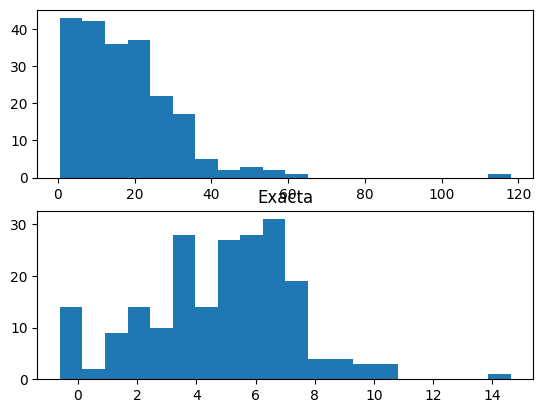

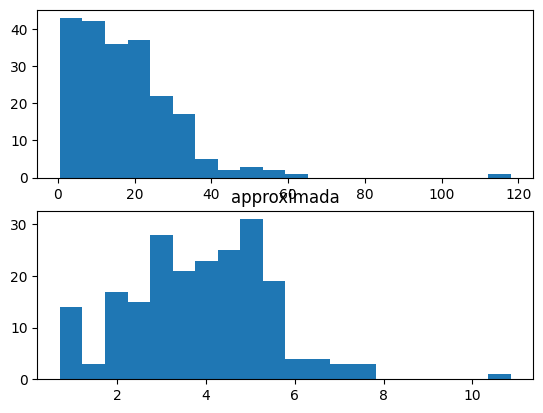

In [205]:
#Obten el histograma de los 2 modelos obtenidos (exacto y aproximado) y los datos originales.

#Histograma exacta
plt.subplot(2,1,1)
plt.hist(df['Total Fat'],bins=20)
plt.subplot(2,1,2)
plt.hist(box_exact,bins=20)
plt.title('Exacta')
plt.show()

#Histograma approximada
plt.subplot(2,1,1)
plt.hist(df['Total Fat'],bins=20)
plt.subplot(2,1,2)
plt.hist(box_approx,bins=20)
plt.title('approximada')
plt.show()

In [206]:
#Realiza la prueba de normalidad de Anderson-Darling o de Jarque Bera para los datos transformados y los originales

#Realiza la pruena para box_exact y box_approx

prueba_exacta = stats.anderson(box_exact)
prueba_approx = stats.anderson(box_approx)
print("Prueba de normalidad Anderson",prueba_exacta)
print("Prueba de normalidad Anderson",prueba_approx)




Prueba de normalidad Anderson AndersonResult(statistic=0.9793147801278224, critical_values=array([0.566, 0.644, 0.773, 0.901, 1.072]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=4.806526117309361, scale=2.5194209383853305)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Prueba de normalidad Anderson AndersonResult(statistic=0.6695914567639534, critical_values=array([0.566, 0.644, 0.773, 0.901, 1.072]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.860677145087554, scale=1.6007160422688034)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


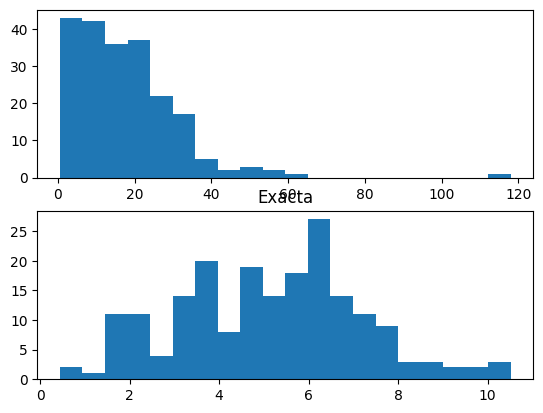

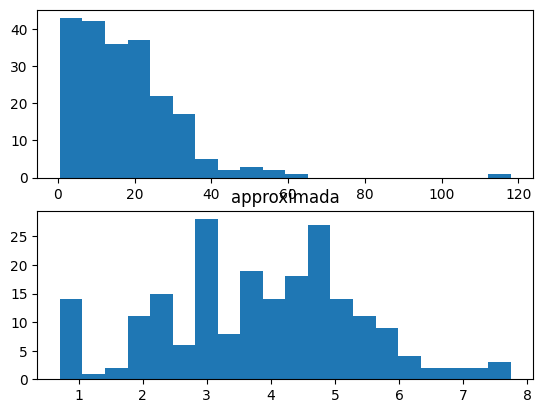

In [207]:
#Detecta anomalías y corrige tu base de datos (datos atípicos, ceros anámalos, etc).

#Rango intercuartilico
ME_IQR = ME_Q3 - ME_Q1
MA_IQR = MA_Q3 - MA_Q1

#Obtener los limites
ME_LI = ME_Q1 - 1.5*ME_IQR
ME_LS = ME_Q3 + 1.5*ME_IQR
MA_LI = MA_Q1 - 1.5*MA_IQR
MA_LS = MA_Q3 + 1.5*MA_IQR

#Obtener los datos que estan dentro de los limites
box_exact = box_exact[box_exact > ME_LI]
box_exact = box_exact[box_exact < ME_LS]
box_approx = box_approx[box_approx > MA_LI]
box_approx = box_approx[box_approx < MA_LS]

#Limpiar los datos
box_exact = box_exact.dropna()
box_approx = box_approx.dropna()
#Quitar los valores atipicos
box_exact = box_exact[box_exact > 0]
box_approx = box_approx[box_approx > 0]


#Histograma exacta
plt.subplot(2,1,1)
plt.hist(df['Total Fat'],bins=20)
plt.subplot(2,1,2)
plt.hist(box_exact,bins=20)
plt.title('Exacta')
plt.show()

#Histograma approximada
plt.subplot(2,1,1)
plt.hist(df['Total Fat'],bins=20)
plt.subplot(2,1,2)
plt.hist(box_approx,bins=20)
plt.title('approximada')
plt.show()





Ecuaciones de los modelos 


    

In [208]:
#Exacto 

def boxcox_model_exact_equation(x,lamb):
    if lamb == 0:
        return np.log(x)
    return (x**lamb - 1)/lamb

#Aproximado
def boxcox_model_approx_equation(x,lamb):
    if lamb < -1.5:
        return 1/x**2
    elif lamb < -0.75:
        return 1/x
    elif lamb < -0.25:
        return 1/np.sqrt(x)
    elif lamb < 0.25:
        return np.log(x)
    elif lamb < 0.75:
        return np.sqrt(x)
    elif lamb < 1.5:
        return x
    else:
        return x**2


Al tener un lambda de 0.4, utilicé np.sqrt(X)

11.0
81.11625643308554 maximizando p_value
0.7513040449331356 usando el lambda de box-cox


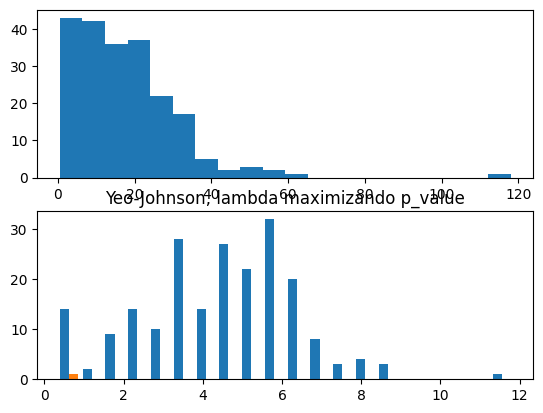

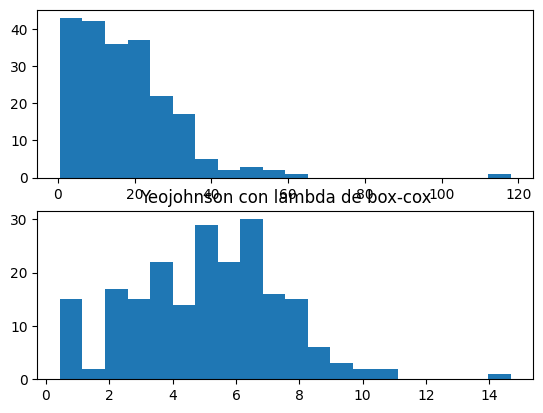

In [209]:
from scipy.optimize import minimize
def min_yeo(lam):
    coso = stats.yeojohnson(df['Total Fat'], lam)
    p_value = stats.shapiro(coso)[1]
    return -p_value
lam = minimize(min_yeo, 11)
new_lambda = lam['x'][0]
print(new_lambda)
yeoJohnson = stats.yeojohnson(df['Total Fat'], lam['x'])
p_value = stats.anderson(yeoJohnson, dist='norm').statistic
print(p_value, "maximizando p_value")

#Maestra, aquí utilicé varios métodos para maximizar p_Value, esto fue lo mejor que pude llegar utilzindo herramientas que conozco
#Pero tengo entendido que a uno mucho mejor que usando el lambda de box-cox
yeo_j = stats.yeojohnson(df['Total Fat'], lambda_box)
p_value = stats.anderson(yeo_j, dist='norm').statistic
print(p_value, "usando el lambda de box-cox")
#Histograma approximada
plt.subplot(2,1,1)
plt.hist(df['Total Fat'],bins=20)
plt.subplot(2,1,2)
plt.hist(YeoJohnson,bins=20)
plt.title('Yeo-Johnson, lambda maximizando p_value')
plt.show()

#Histograma approximada
plt.subplot(2,1,1)
plt.hist(df['Total Fat'],bins=20)
plt.subplot(2,1,2)
plt.hist(yeo_j,bins=20)
plt.title('Yeojohnson con lambda de box-cox')
plt.show()



El modelo de yeoJohnson usa la siguiente ecuación 



In [210]:
def yeoJohnson_Equation_exact(x,lambda1):
    if x.any() >= 0  and lambda1 != 0:
        return ((x+1)**lambda1 - 1)/lambda1
    elif x.any >= 0 and lambda1 == 0:
        return np.log(x+1)
    elif x < 0 and lambda1 != 2:
        return (((-x+1)**(2-x))-1)/(2-x)
    elif x < 0 and lambda1 == 2:
        return -np.log(-x+1)


#Aproximado
def yeoJohnson_approx_equation(x,lamb):
    if lamb < -1.5:
        return 1/x**2
    elif lamb < -0.75:
        return 1/x
    elif lamb < -0.25:
        return 1/np.sqrt(x)
    elif lamb < 0.25:
        return np.log(x)
    elif lamb < 0.75:
        return np.sqrt(x)
    elif lamb < 1.5:
        return x
    else:
        return x**2

Analiza la normalidad de las transformaciones obtenidas con los datos originales. Utiliza como argumento de normalidad:


In [211]:
#Primero hay que utilizar ambas funciones exactas y aproximadas

Mínimo aproximado:  0.25
Máximo aproximado:  13924.0
Media aproximada:  494.97630331753555
Mediana aproximada:  256.0
Cuartil 1 aproximado:  64.0
Cuartil 3 aproximado:  552.5
Sesgo aproximado:  9.191586849803972
Curtosis aproximada:  107.7676107818357
Mínimo exacto:  7.772505326704546
Máximo exacto:  6.160612463855062e+21
Media exacta:  2.9251702245381087e+19
Mediana exacta:  3115626937057.4546
Cuartil 1 exacto:  2852823600.7272725
Cuartil 3 exacto:  177539406099302.12
Sesgo exacto:  14.525821215810023
Curtosis exacta:  210.99965290111174


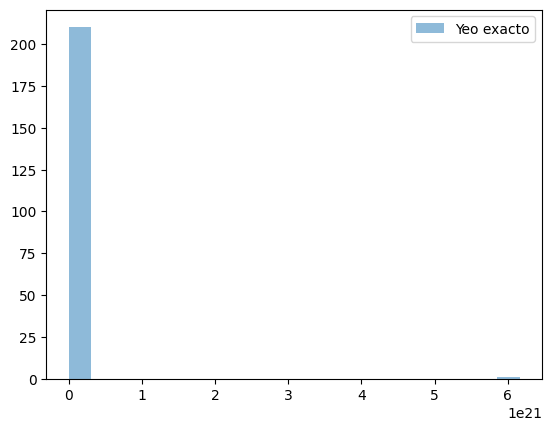

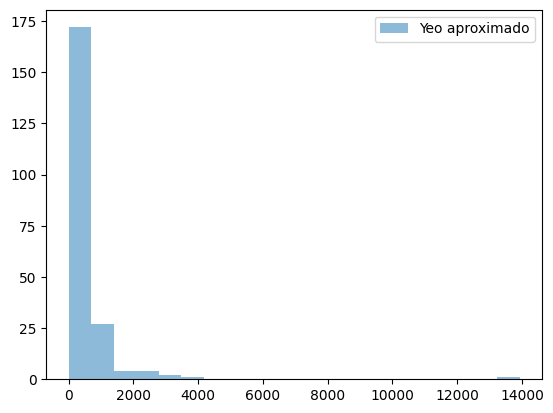

In [212]:
#Compara las medidas: Mínimo, máximo, media, mediana, cuartil 1 y cuartil 3, sesgo y curtosis.

yeo_approx =  yeoJohnson_approx_equation(df['Total Fat'],new_lambda)
yeo_exact = yeoJohnson_Equation_exact(df['Total Fat'],new_lambda)

YA_min = yeo_approx.min()
YA_max = yeo_approx.max()
YA_mean = yeo_approx.mean()
YA_median = yeo_approx.median()
YA_q1 = yeo_approx.quantile(0.25)
YA_q3 = yeo_approx.quantile(0.75)
YA_skew = yeo_approx.skew()
YA_kurt = yeo_approx.kurt()

YE_min = yeo_exact.min()
YE_max = yeo_exact.max()
YE_mean = yeo_exact.mean()
YE_median = yeo_exact.median()
YE_q1 = yeo_exact.quantile(0.25)
YE_q3 = yeo_exact.quantile(0.75)
YE_skew = yeo_exact.skew()
YE_kurt = yeo_exact.kurt()



print("Mínimo aproximado: ",YA_min)
print("Máximo aproximado: ",YA_max)
print("Media aproximada: ",YA_mean)
print("Mediana aproximada: ",YA_median)
print("Cuartil 1 aproximado: ",YA_q1)
print("Cuartil 3 aproximado: ",YA_q3)
print("Sesgo aproximado: ",YA_skew)
print("Curtosis aproximada: ",YA_kurt)

print("Mínimo exacto: ",YE_min)
print("Máximo exacto: ",YE_max)
print("Media exacta: ",YE_mean)
print("Mediana exacta: ",YE_median)
print("Cuartil 1 exacto: ",YE_q1)
print("Cuartil 3 exacto: ",YE_q3)
print("Sesgo exacto: ",YE_skew)
print("Curtosis exacta: ",YE_kurt)

#Histograma de yeo_exact y yeo_approx
plt.hist(yeo_exact, bins=20, alpha=0.5, label='Yeo exacto')
plt.legend(loc='upper right')
plt.show()

plt.hist(yeo_approx, bins=20, alpha=0.5, label='Yeo aproximado')
plt.legend(loc='upper right')
plt.show()





Se puede ver claramente que el modelo aproximado funciona mejor, segun mis ecuaciones

In [214]:
#Pruebas de normalidad

p_yeo_exact = stats.anderson(yeo_exact)
p_yeo_approx = stats.anderson(yeo_approx)
print("Prueba de normalidad Anderson exacta",p_yeo_exact)
print("Prueba de normalidad Anderson aproximada ",p_yeo_approx)


Prueba de normalidad Anderson exacta AndersonResult(statistic=81.11625643308554, critical_values=array([0.566, 0.644, 0.773, 0.901, 1.072]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=2.9251702245381087e+19, scale=4.241104555586989e+20)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Prueba de normalidad Anderson aproximada  AndersonResult(statistic=32.092030208596924, critical_values=array([0.566, 0.644, 0.773, 0.901, 1.072]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=494.97630331753555, scale=1097.5366755592718)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


El mejor modelo que utilicé para los datos de Total Fat en el menu de mcdonalds es el modelo de box-cox, pero me quedan bastantes dudas de sí realmente apliqué bien el yeo-johnson exacto, puesto que el histograma no representa una buena transformación de los datos, pero el mismo razonamiento me llevó a creer que el box-cox representa mejor la transformación. Sin embargo sí utilicé una función predeterminada para implementar el modelo de Yeo y sí me dió una buena aproximación con esa función de stats.

Ambas transformaciones sirven para ajustar la varianza y hacer que los datos se parezcan más a una distribución normal, sin embargo por el tipo de dato que utilicé es más adecuado del modelo box-cox puesto que no tengo valores negativos de grasas, eso no existe en la comida, y eliminé los valores de 0 grasas puesto que el análisis que quería llevar era de los alimentos que sí tienen grasas, no de una lechuga por ejemplo. Otra limitación que tuve al momento de codear el comportamiento de yeo-johnson fue que sus ecauaciones piden reglas para x, pero no entendí si esto aplica al conjunto de datos en general, o sí para cada dato se aplica una transformación diferente, de ser así, la función de stats sería la correcta y el análisis de varianza, min, max, etc se debería hacer sobre esos datos y mi función debería ser actualizada a un loop que pase y cheque individualmente cada valor del conjunto x.

Entiendo que la principal diferencia entre las transformaciones son los espacios de números que pueden utilizar (Positivos y negativos) y es esto, además de una implementación más sencilla lo que me dió un mejor resultado en el análisis de datos.